In [ ]:
import os
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

Using device: cuda


In [ ]:
from google.colab import files
from zipfile import ZipFile

uploaded = files.upload()
zip_name = list(uploaded.keys())[0]

with ZipFile(zip_name, 'r') as zip_ref:
    zip_ref.extractall("data")

print("Dataset contents:")
!ls data


Saving Dataset-1k.zip to Dataset-1k.zip
Dataset contents:
Dataset-1k


Using 1181 matched image pairs


Epoch [1/200] Loss: 0.3507 | Time: 59.23s


Epoch [2/200] Loss: 0.2089 | Time: 61.17s


Epoch [3/200] Loss: 0.1339 | Time: 63.23s


Epoch [4/200] Loss: 0.0866 | Time: 62.90s


Epoch [5/200] Loss: 0.0602 | Time: 62.86s


Epoch [6/200] Loss: 0.0432 | Time: 62.93s


Epoch [7/200] Loss: 0.0333 | Time: 63.03s


Epoch [8/200] Loss: 0.0277 | Time: 62.95s


Epoch [9/200] Loss: 0.0243 | Time: 63.22s


Epoch [10/200] Loss: 0.0209 | Time: 63.06s


Epoch [11/200] Loss: 0.0142 | Time: 63.08s


Epoch [12/200] Loss: 0.0124 | Time: 62.98s


Epoch [13/200] Loss: 0.0114 | Time: 62.96s


Epoch [14/200] Loss: 0.0108 | Time: 62.97s


Epoch [15/200] Loss: 0.0102 | Time: 62.99s


Epoch [16/200] Loss: 0.0093 | Time: 63.01s


Epoch [17/200] Loss: 0.0087 | Time: 63.01s


Epoch [18/200] Loss: 0.0084 | Time: 63.08s


Epoch [19/200] Loss: 0.0082 | Time: 63.02s


Epoch [20/200] Loss: 0.0078 | Time: 62.97s


Epoch [21/200] Loss: 0.0076 | Time: 63.00s


Epoch [22/200] Loss: 0.0078 | Time: 63.03s


Epoch [23/200] Loss: 0.0073 | Time: 62.99s


Epoch [24/200] Loss: 0.0074 | Time: 63.00s


Epoch [25/200] Loss: 0.0069 | Time: 63.11s


Epoch [26/200] Loss: 0.0067 | Time: 63.42s


Epoch [27/200] Loss: 0.0067 | Time: 63.00s


Epoch [28/200] Loss: 0.0070 | Time: 62.97s


Epoch [29/200] Loss: 0.0066 | Time: 62.98s


Epoch [30/200] Loss: 0.0064 | Time: 63.11s


Epoch [31/200] Loss: 0.0067 | Time: 63.17s


Epoch [32/200] Loss: 0.0061 | Time: 62.96s


Epoch [33/200] Loss: 0.0060 | Time: 63.01s


Epoch [34/200] Loss: 0.0059 | Time: 63.07s


Epoch [35/200] Loss: 0.0058 | Time: 63.04s


Epoch [36/200] Loss: 0.0061 | Time: 62.97s


Epoch [37/200] Loss: 0.0061 | Time: 63.11s


Epoch [38/200] Loss: 0.0061 | Time: 63.08s


Epoch [39/200] Loss: 0.0059 | Time: 63.09s


Epoch [40/200] Loss: 0.0055 | Time: 62.97s


Epoch [41/200] Loss: 0.0054 | Time: 63.00s


Epoch [42/200] Loss: 0.0053 | Time: 63.09s


Epoch [43/200] Loss: 0.0057 | Time: 63.19s


Epoch [44/200] Loss: 0.0052 | Time: 63.12s


Epoch [45/200] Loss: 0.0051 | Time: 63.00s


Epoch [46/200] Loss: 0.0057 | Time: 63.02s


Epoch [47/200] Loss: 0.0053 | Time: 63.16s


Epoch [48/200] Loss: 0.0051 | Time: 63.08s


Epoch [49/200] Loss: 0.0053 | Time: 63.06s


Epoch [50/200] Loss: 0.0050 | Time: 62.99s


Epoch [51/200] Loss: 0.0048 | Time: 63.00s


Epoch [52/200] Loss: 0.0047 | Time: 63.06s


Epoch [53/200] Loss: 0.0048 | Time: 63.19s


Epoch [54/200] Loss: 0.0046 | Time: 63.27s


Epoch [55/200] Loss: 0.0056 | Time: 63.07s


Epoch [56/200] Loss: 0.0051 | Time: 63.02s


Epoch [57/200] Loss: 0.0046 | Time: 63.05s


Epoch [58/200] Loss: 0.0045 | Time: 63.11s


Epoch [59/200] Loss: 0.0044 | Time: 63.17s


Epoch [60/200] Loss: 0.0042 | Time: 63.19s


Epoch [61/200] Loss: 0.0042 | Time: 63.22s


Epoch [62/200] Loss: 0.0043 | Time: 63.04s


Epoch [63/200] Loss: 0.0046 | Time: 63.03s


Epoch [64/200] Loss: 0.0043 | Time: 63.09s


Epoch [65/200] Loss: 0.0043 | Time: 63.12s


Epoch [66/200] Loss: 0.0043 | Time: 63.18s


Epoch [67/200] Loss: 0.0041 | Time: 63.07s


Epoch [68/200] Loss: 0.0040 | Time: 63.08s


Epoch [69/200] Loss: 0.0047 | Time: 63.19s


Epoch [70/200] Loss: 0.0045 | Time: 63.18s


Epoch [71/200] Loss: 0.0044 | Time: 63.23s


Epoch [72/200] Loss: 0.0039 | Time: 63.14s


Epoch [73/200] Loss: 0.0039 | Time: 63.13s


Epoch [74/200] Loss: 0.0039 | Time: 63.26s


Epoch [75/200] Loss: 0.0038 | Time: 63.29s


Epoch [76/200] Loss: 0.0038 | Time: 63.15s


Epoch [77/200] Loss: 0.0039 | Time: 63.10s


Epoch [78/200] Loss: 0.0039 | Time: 63.09s


Epoch [79/200] Loss: 0.0040 | Time: 63.24s


Epoch [80/200] Loss: 0.0038 | Time: 63.11s


Epoch [81/200] Loss: 0.0039 | Time: 63.06s


Epoch [82/200] Loss: 0.0039 | Time: 63.15s


Epoch [83/200] Loss: 0.0037 | Time: 63.38s


Epoch [84/200] Loss: 0.0036 | Time: 63.35s


Epoch [85/200] Loss: 0.0036 | Time: 63.12s


Epoch [86/200] Loss: 0.0034 | Time: 63.02s


Epoch [87/200] Loss: 0.0034 | Time: 63.13s


Epoch [88/200] Loss: 0.0036 | Time: 63.18s


Epoch [89/200] Loss: 0.0041 | Time: 63.18s


Epoch [90/200] Loss: 0.0037 | Time: 63.23s


Epoch [91/200] Loss: 0.0034 | Time: 63.17s


Epoch [92/200] Loss: 0.0036 | Time: 63.16s


Epoch [93/200] Loss: 0.0036 | Time: 63.20s


Epoch [94/200] Loss: 0.0034 | Time: 63.33s


Epoch [95/200] Loss: 0.0033 | Time: 63.15s


Epoch [96/200] Loss: 0.0032 | Time: 63.12s


Epoch [97/200] Loss: 0.0032 | Time: 63.18s


Epoch [98/200] Loss: 0.0041 | Time: 63.32s


Epoch [99/200] Loss: 0.0034 | Time: 63.15s


Epoch [100/200] Loss: 0.0032 | Time: 63.13s


Epoch [101/200] Loss: 0.0031 | Time: 63.34s


Epoch [102/200] Loss: 0.0032 | Time: 63.27s


Epoch [103/200] Loss: 0.0032 | Time: 63.20s


Epoch [104/200] Loss: 0.0031 | Time: 63.30s


Epoch [105/200] Loss: 0.0030 | Time: 63.20s


Epoch [106/200] Loss: 0.0030 | Time: 63.19s


Epoch [107/200] Loss: 0.0031 | Time: 63.26s


Epoch [108/200] Loss: 0.0030 | Time: 63.27s


Epoch [109/200] Loss: 0.0029 | Time: 63.19s


Epoch [110/200] Loss: 0.0029 | Time: 63.12s


Epoch [111/200] Loss: 0.0032 | Time: 63.10s


Epoch [112/200] Loss: 0.0039 | Time: 63.23s


Epoch [113/200] Loss: 0.0035 | Time: 63.42s


Epoch [114/200] Loss: 0.0030 | Time: 63.32s


Epoch [115/200] Loss: 0.0029 | Time: 63.13s


Epoch [116/200] Loss: 0.0028 | Time: 63.13s


Epoch [117/200] Loss: 0.0028 | Time: 63.06s


Epoch [118/200] Loss: 0.0028 | Time: 63.10s


Epoch [119/200] Loss: 0.0027 | Time: 63.10s


Epoch [120/200] Loss: 0.0027 | Time: 63.10s


Epoch [121/200] Loss: 0.0027 | Time: 63.23s


Epoch [122/200] Loss: 0.0028 | Time: 63.21s


Epoch [123/200] Loss: 0.0031 | Time: 63.12s


Epoch [124/200] Loss: 0.0028 | Time: 63.14s


Epoch [125/200] Loss: 0.0027 | Time: 63.12s


Epoch [126/200] Loss: 0.0027 | Time: 63.24s


Epoch [127/200] Loss: 0.0028 | Time: 63.07s


Epoch [128/200] Loss: 0.0027 | Time: 63.24s


Epoch [129/200] Loss: 0.0026 | Time: 63.38s


Epoch [130/200] Loss: 0.0028 | Time: 63.24s


Epoch [131/200] Loss: 0.0027 | Time: 63.15s


Epoch [132/200] Loss: 0.0028 | Time: 63.17s


Epoch [133/200] Loss: 0.0027 | Time: 63.16s


Epoch [134/200] Loss: 0.0026 | Time: 63.32s


Epoch [135/200] Loss: 0.0030 | Time: 63.17s


Epoch [136/200] Loss: 0.0029 | Time: 63.08s


Epoch [137/200] Loss: 0.0030 | Time: 63.16s


Epoch [138/200] Loss: 0.0027 | Time: 63.26s


Epoch [139/200] Loss: 0.0026 | Time: 63.24s


Epoch [140/200] Loss: 0.0025 | Time: 63.14s


Epoch [141/200] Loss: 0.0025 | Time: 63.11s


Epoch [142/200] Loss: 0.0025 | Time: 63.24s


Epoch [143/200] Loss: 0.0024 | Time: 63.32s


Epoch [144/200] Loss: 0.0025 | Time: 63.12s


Epoch [145/200] Loss: 0.0025 | Time: 63.21s


Epoch [146/200] Loss: 0.0032 | Time: 63.27s


Epoch [147/200] Loss: 0.0026 | Time: 63.27s


Epoch [148/200] Loss: 0.0025 | Time: 63.12s


Epoch [149/200] Loss: 0.0024 | Time: 63.20s


Epoch [150/200] Loss: 0.0024 | Time: 63.33s


Epoch [151/200] Loss: 0.0024 | Time: 63.39s


Epoch [152/200] Loss: 0.0023 | Time: 63.18s


Epoch [153/200] Loss: 0.0023 | Time: 63.18s


Epoch [154/200] Loss: 0.0023 | Time: 63.33s


Epoch [155/200] Loss: 0.0023 | Time: 63.23s


Epoch [156/200] Loss: 0.0023 | Time: 63.11s


Epoch [157/200] Loss: 0.0024 | Time: 63.08s


Epoch [158/200] Loss: 0.0035 | Time: 63.17s


Epoch [159/200] Loss: 0.0025 | Time: 63.40s


Epoch [160/200] Loss: 0.0023 | Time: 63.21s


Epoch [161/200] Loss: 0.0023 | Time: 63.16s


Epoch [162/200] Loss: 0.0022 | Time: 63.13s


Epoch [163/200] Loss: 0.0022 | Time: 63.11s


Epoch [164/200] Loss: 0.0022 | Time: 63.25s


Epoch [165/200] Loss: 0.0022 | Time: 63.35s


Epoch [166/200] Loss: 0.0022 | Time: 63.26s


Epoch [167/200] Loss: 0.0022 | Time: 63.26s


Epoch [168/200] Loss: 0.0022 | Time: 63.33s


Epoch [169/200] Loss: 0.0022 | Time: 63.14s


Epoch [170/200] Loss: 0.0022 | Time: 63.09s


Epoch [171/200] Loss: 0.0022 | Time: 63.28s


Epoch [172/200] Loss: 0.0022 | Time: 63.31s


Epoch [173/200] Loss: 0.0027 | Time: 63.27s


Epoch [174/200] Loss: 0.0031 | Time: 63.30s


Epoch [175/200] Loss: 0.0024 | Time: 63.16s


Epoch [176/200] Loss: 0.0022 | Time: 63.14s


Epoch [177/200] Loss: 0.0022 | Time: 63.37s


Epoch [178/200] Loss: 0.0021 | Time: 63.27s


Epoch [179/200] Loss: 0.0022 | Time: 63.16s


Epoch [180/200] Loss: 0.0021 | Time: 63.20s


Epoch [181/200] Loss: 0.0021 | Time: 63.40s


Epoch [182/200] Loss: 0.0021 | Time: 63.47s


Epoch [183/200] Loss: 0.0021 | Time: 63.38s


Epoch [184/200] Loss: 0.0025 | Time: 63.17s


Epoch [185/200] Loss: 0.0024 | Time: 63.13s


Epoch [186/200] Loss: 0.0021 | Time: 63.27s


Epoch [187/200] Loss: 0.0021 | Time: 63.34s


Epoch [188/200] Loss: 0.0021 | Time: 63.18s


Epoch [189/200] Loss: 0.0020 | Time: 63.16s


Epoch [190/200] Loss: 0.0021 | Time: 63.32s


Epoch [191/200] Loss: 0.0020 | Time: 63.41s


Epoch [192/200] Loss: 0.0021 | Time: 63.32s


Epoch [193/200] Loss: 0.0020 | Time: 63.25s


Epoch [194/200] Loss: 0.0020 | Time: 63.07s


Epoch [195/200] Loss: 0.0021 | Time: 63.14s


Epoch [196/200] Loss: 0.0020 | Time: 63.28s


Epoch [197/200] Loss: 0.0021 | Time: 63.29s


Epoch [198/200] Loss: 0.0021 | Time: 63.22s


Epoch [199/200] Loss: 0.0027 | Time: 63.36s


Epoch [200/200] Loss: 0.0025 | Time: 63.26s


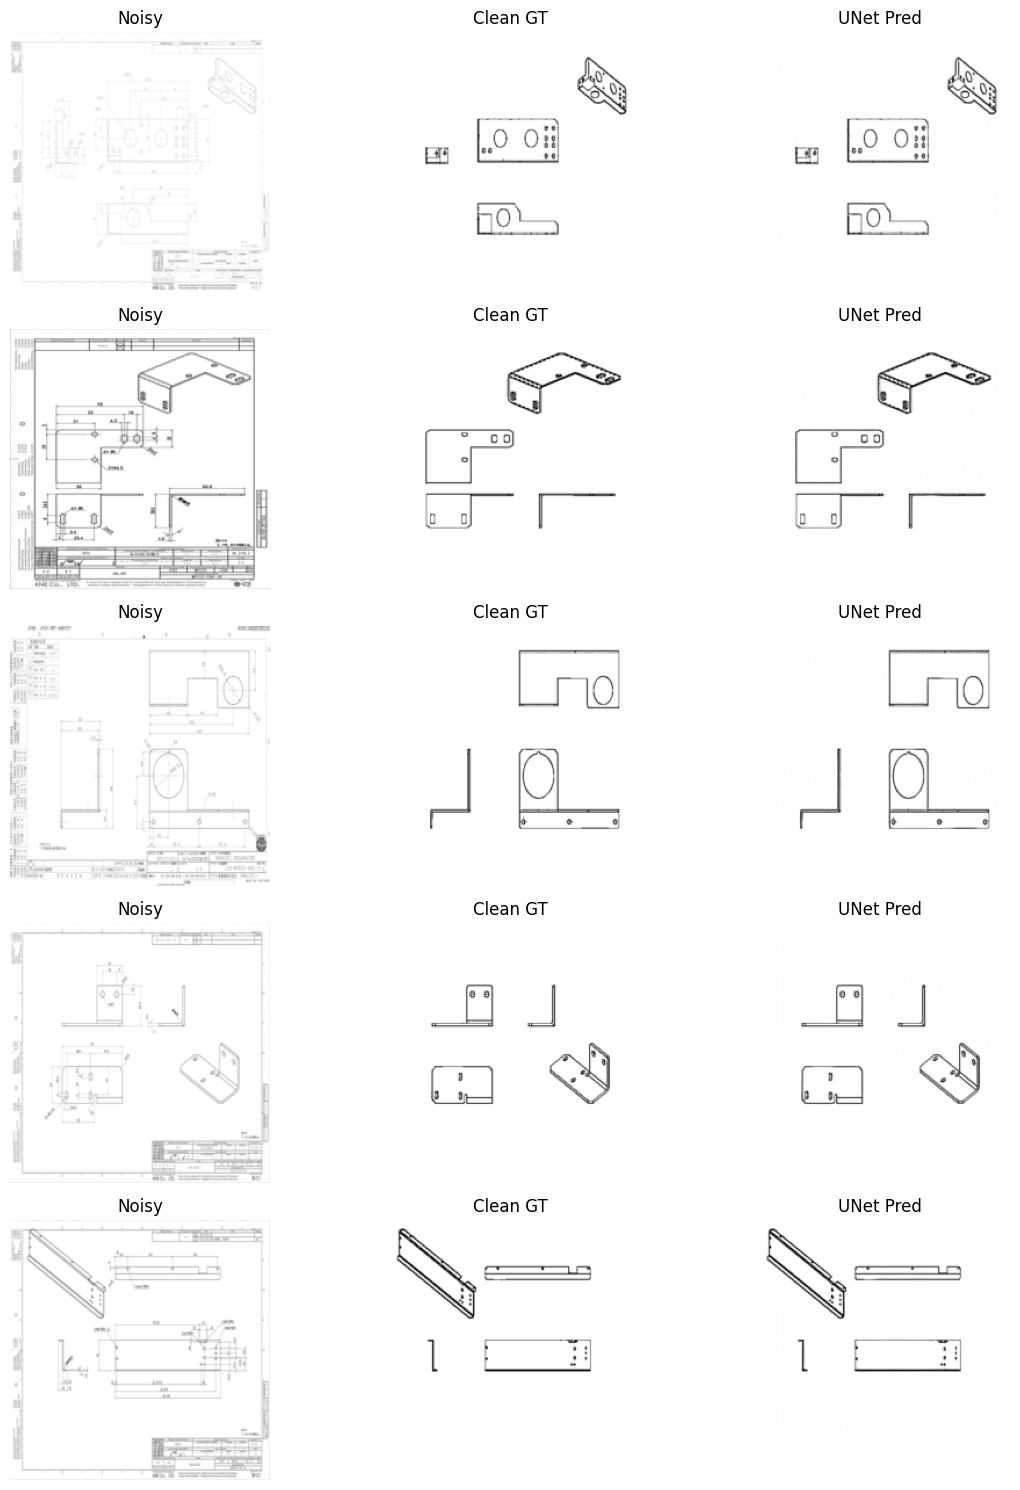

In [ ]:
import torch.nn.functional as F
class SSIMLoss(nn.Module):
    def __init__(self, window_size=11):
        super().__init__()
        self.window_size = window_size

    def forward(self, x, y):

        C1 = 0.01 ** 2
        C2 = 0.03 ** 2

        mu_x = F.avg_pool2d(x, self.window_size, 1, self.window_size // 2)
        mu_y = F.avg_pool2d(y, self.window_size, 1, self.window_size // 2)

        sigma_x = F.avg_pool2d(x * x, self.window_size, 1, self.window_size // 2) - mu_x ** 2
        sigma_y = F.avg_pool2d(y * y, self.window_size, 1, self.window_size // 2) - mu_y ** 2
        sigma_xy = F.avg_pool2d(x * y, self.window_size, 1, self.window_size // 2) - mu_x * mu_y

        ssim = ((2 * mu_x * mu_y + C1) * (2 * sigma_xy + C2)) / \
               ((mu_x ** 2 + mu_y ** 2 + C1) * (sigma_x + sigma_y + C2))

        return 1 - ssim.mean()

class DrawingDenoiseDataset(Dataset):
    def __init__(self, noisy_dir, clean_dir, img_size=224):
        self.noisy_dir = noisy_dir
        self.clean_dir = clean_dir

        noisy_files = os.listdir(noisy_dir)
        clean_files = os.listdir(clean_dir)

        noisy_map = {os.path.splitext(f)[0]: f for f in noisy_files}
        clean_map = {os.path.splitext(f)[0]: f for f in clean_files}

        self.keys = sorted(list(noisy_map.keys() & clean_map.keys()))
        self.noisy_map = noisy_map
        self.clean_map = clean_map

        print(f"Using {len(self.keys)} matched image pairs")

        self.transform = T.Compose([
            T.Resize((img_size, img_size)),
            T.ToTensor()
        ])

    def __len__(self):
        return len(self.keys)

    def __getitem__(self, idx):
        key = self.keys[idx]
        noisy = Image.open(os.path.join(self.noisy_dir, self.noisy_map[key])).convert("RGB")
        clean = Image.open(os.path.join(self.clean_dir, self.clean_map[key])).convert("RGB")
        return self.transform(noisy), self.transform(clean)

class DoubleConv(nn.Module):
    def __init__(self, in_ch, out_ch):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
        )
    def forward(self, x):
        return self.conv(x)

class Down(nn.Module):
    def __init__(self, in_ch, out_ch):
        super().__init__()
        self.down = nn.Sequential(
            nn.MaxPool2d(2),
            DoubleConv(in_ch, out_ch)
        )
    def forward(self, x):
        return self.down(x)

class Up(nn.Module):
    def __init__(self, in_ch, out_ch):
        super().__init__()
        self.up = nn.ConvTranspose2d(in_ch, in_ch//2, 2, stride=2)
        self.conv = DoubleConv(in_ch, out_ch)

    def forward(self, x1, x2):
        x1 = self.up(x1)
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]
        x1 = nn.functional.pad(x1, [diffX//2, diffX-diffX//2, diffY//2, diffY-diffY//2])
        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)

class OutConv(nn.Module):
    def __init__(self, in_ch, out_ch):
        super().__init__()
        self.conv = nn.Conv2d(in_ch, out_ch, 1)
    def forward(self, x):
        return self.conv(x)

class UNet(nn.Module):
    def __init__(self, n_channels=3, n_classes=3):
        super().__init__()
        self.inc = DoubleConv(n_channels, 64)
        self.down1 = Down(64, 128)
        self.down2 = Down(128, 256)
        self.down3 = Down(256, 512)
        self.down4 = Down(512, 1024)

        self.up1 = Up(1024, 512)
        self.up2 = Up(512, 256)
        self.up3 = Up(256, 128)
        self.up4 = Up(128, 64)

        self.outc = OutConv(64, n_classes)
        self.final = nn.Sigmoid()

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)

        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)

        x = self.outc(x)
        return self.final(x)
dataset = DrawingDenoiseDataset(
    noisy_dir="data/Dataset-1k/New_Data100/Noisy",
    clean_dir="data/Dataset-1k/New_Data100/Clean"
)

loader = DataLoader(
    dataset,
    batch_size=4,
    shuffle=True,
    num_workers=2,
    pin_memory=True
)
model = UNet().to(device)

l1_loss = nn.L1Loss()
ssim_loss = SSIMLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

epochs = 200

for epoch in range(epochs):
    model.train()
    total_loss = 0
    start = time.time()

    progress = tqdm(loader, desc=f"Epoch [{epoch+1}/{epochs}]", leave=False)

    for noisy, clean in progress:
        noisy = noisy.to(device)
        clean = clean.to(device)

        optimizer.zero_grad()

        pred = model(noisy)

        loss_l1 = l1_loss(pred, clean)
        loss_ssim = ssim_loss(pred, clean)
        loss = 0.8 * loss_l1 + 0.2 * loss_ssim

        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        progress.set_postfix(loss=f"{loss.item():.4f}")

    epoch_time = time.time() - start
    print(f"Epoch [{epoch+1}/{epochs}] Loss: {total_loss/len(loader):.4f} | Time: {epoch_time:.2f}s")

def show_samples(model, dataset, num=5):
    model.eval()
    idxs = torch.randperm(len(dataset))[:num]

    plt.figure(figsize=(12, 3 * num))
    for i, idx in enumerate(idxs):
        noisy, clean = dataset[idx]
        noisy_b = noisy.unsqueeze(0).to(device)

        with torch.no_grad():
            pred = model(noisy_b)

        noisy = noisy.permute(1,2,0).cpu()
        clean = clean.permute(1,2,0)
        pred = pred.squeeze().permute(1,2,0).cpu()

        plt.subplot(num, 3, i*3+1)
        plt.imshow(noisy)
        plt.title("Noisy")
        plt.axis("off")

        plt.subplot(num, 3, i*3+2)
        plt.imshow(clean)
        plt.title("Clean GT")
        plt.axis("off")

        plt.subplot(num, 3, i*3+3)
        plt.imshow(pred)
        plt.title("UNet Pred")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

show_samples(model, dataset, num=5)


In [ ]:
torch.save(model.state_dict(), "unet_denoiser.pth")
from google.colab import files
files.download("unet_denoiser.pth")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
from zipfile import ZipFile
import os

uploaded = files.upload()

zip_name = list(uploaded.keys())[0]

with ZipFile(zip_name, 'r') as zip_ref:
    zip_ref.extractall("test_data")

print("Test data extracted")
!ls test_data


Saving test_data.zip to test_data (2).zip
Test data extracted
'To test'


In [ ]:
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torchvision.transforms as T
import os

class NoisyOnlyDataset(Dataset):
    def __init__(self, noisy_dir, img_size=224):
        self.noisy_dir = noisy_dir
        self.files = sorted(os.listdir(noisy_dir))

        self.transform = T.Compose([
            T.Resize((img_size, img_size)),
            T.ToTensor()
        ])

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        img_name = self.files[idx]
        img_path = os.path.join(self.noisy_dir, img_name)

        img = Image.open(img_path).convert("RGB")
        return self.transform(img), img_name


In [ ]:
import torch
import torch.nn as nn

device = "cuda" if torch.cuda.is_available() else "cpu"

model = UNet().to(device)
model.load_state_dict(torch.load("unet_denoiser.pth", map_location=device))
model.eval()

print("UNet model loaded for testing")
import torchvision.utils as vutils

test_dataset = NoisyOnlyDataset("test_data/To test")
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

os.makedirs("predicted_outputs", exist_ok=True)

with torch.no_grad():
    for noisy, name in test_loader:
        noisy = noisy.to(device)

        pred = model(noisy)
        pred = pred.clamp(0, 1)

        save_path = os.path.join("predicted_outputs", name[0])
        vutils.save_image(pred, save_path)

print("All predicted images saved in 'predicted_outputs/' folder")

UNet model loaded for testing
All predicted images saved in 'predicted_outputs/' folder


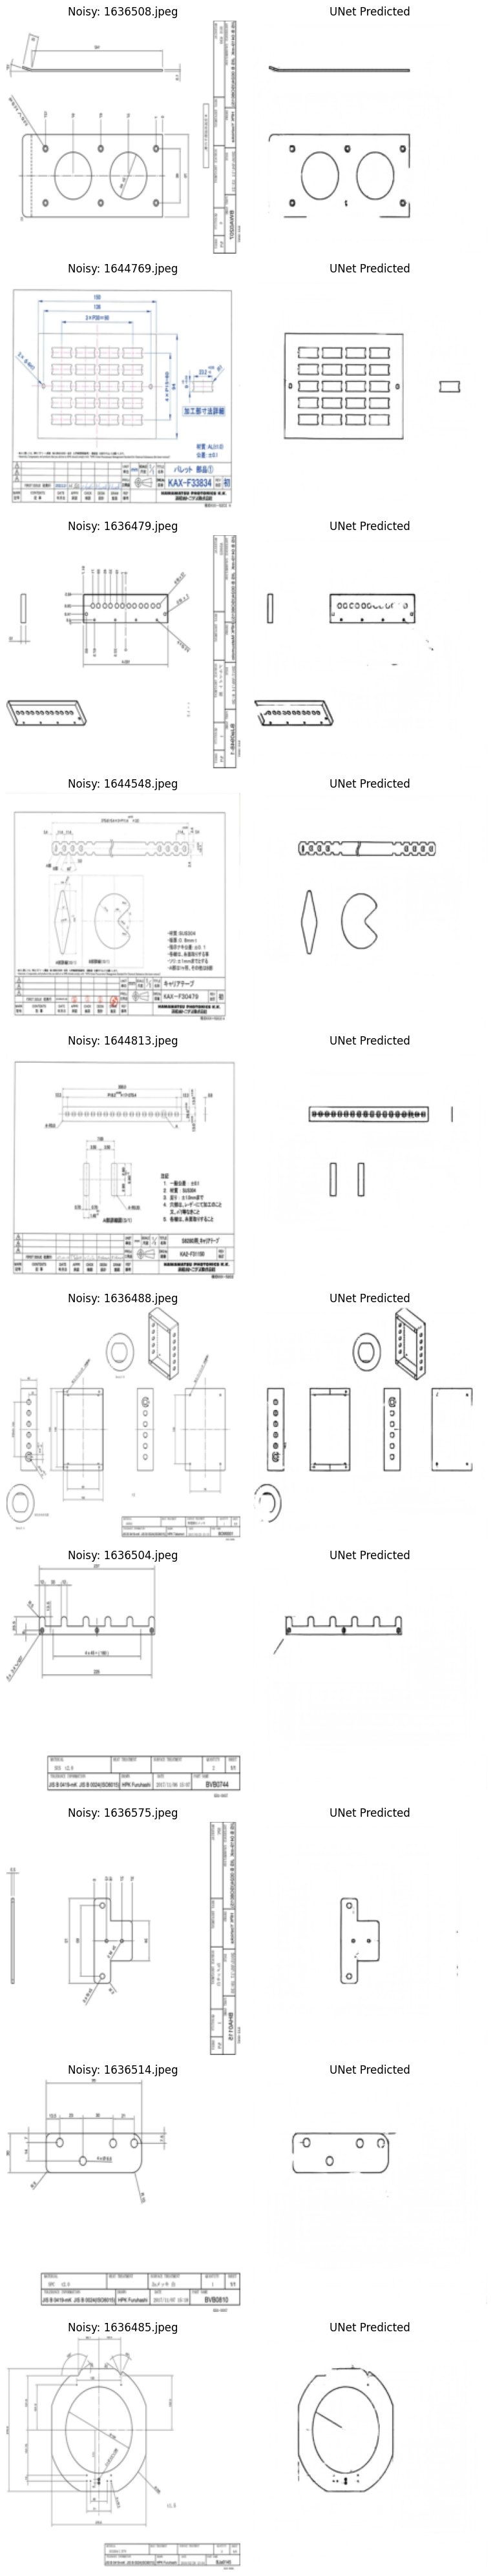

In [ ]:
import random
import matplotlib.pyplot as plt

def show_random_predictions(model, dataset, num_samples=5):
    indices = random.sample(range(len(dataset)), num_samples)

    plt.figure(figsize=(8, 4 * num_samples))

    for i, idx in enumerate(indices):
        noisy, name = dataset[idx]
        noisy_b = noisy.unsqueeze(0).to(device)

        with torch.no_grad():
            pred = model(noisy_b)

        noisy = noisy.cpu().permute(1,2,0)
        pred = pred.cpu().squeeze().permute(1,2,0).clamp(0,1)

        plt.subplot(num_samples, 2, i*2 + 1)
        plt.imshow(noisy)
        plt.title(f"Noisy: {name}")
        plt.axis("off")

        plt.subplot(num_samples, 2, i*2 + 2)
        plt.imshow(pred)
        plt.title("UNet Predicted")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

show_random_predictions(model, test_dataset, num_samples=10)

In [ ]:
import shutil
from google.colab import files

shutil.make_archive(
    "UNet_Predicted_Outputs",
    'zip',
    "predicted_outputs"
)
print("Zip file created")
files.download("UNet_Predicted_Outputs.zip")

Zip file created


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>